In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataframe
try:
    df = pd.read_csv('/content/weather_classification_data.csv')
    print("Dataset loaded successfully.")
    # Display basic info (optional)
    # print(df.head().to_markdown(index=False))
    # df.info()
except FileNotFoundError:
    print("Error: 'weather_classification_data.csv' not found. Please ensure the file is uploaded.")
    # Handle error appropriately if needed
    df = None # Set df to None if file not found

# Basic setup for tests
alpha = 0.05 # Significance level for hypothesis tests

# Proceed only if df is loaded
if df is not None:
  print(f"DataFrame shape: {df.shape}")

Dataset loaded successfully.
DataFrame shape: (13200, 11)


--- Analyzing Distribution of Temperature ---


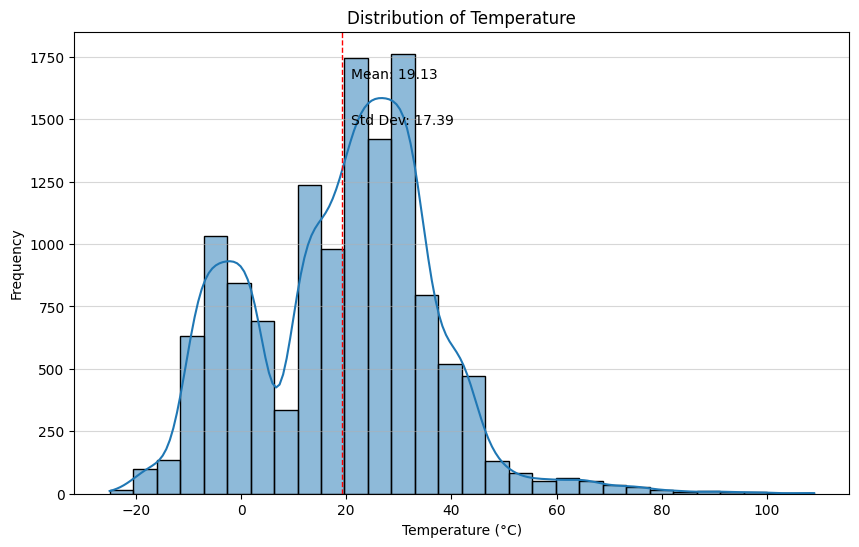

Skewness of Temperature: 0.22
Kurtosis of Temperature: 0.59
------------------------------


In [5]:
# Proceed only if df is loaded
if 'df' in globals() and df is not None:
    print("--- Analyzing Distribution of Temperature ---")
    # Plot histogram and density plot for Temperature
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Temperature'], kde=True, bins=30)
    plt.title('Distribution of Temperature')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')

    # Add labels for mean and standard deviation
    mean_temp = df['Temperature'].mean()
    std_temp = df['Temperature'].std()
    plt.axvline(mean_temp, color='red', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    # Adjust text position slightly to avoid overlap if possible
    plt.text(mean_temp + (std_temp * 0.1), max_ylim*0.9, f'Mean: {mean_temp:.2f}')
    plt.text(mean_temp + (std_temp * 0.1), max_ylim*0.8, f'Std Dev: {std_temp:.2f}')

    plt.grid(axis='y', alpha=0.5)
    plt.show() # Display the plot

    # Calculate Skewness and Kurtosis
    skewness = df['Temperature'].skew()
    kurtosis = df['Temperature'].kurt()
    print(f"Skewness of Temperature: {skewness:.2f}")
    print(f"Kurtosis of Temperature: {kurtosis:.2f}")
    print("-" * 30)
else:
    print("DataFrame 'df' not found. Please run the loading block first.")

In [6]:
# Proceed only if df is loaded
if 'df' in globals() and df is not None:
    print("--- Calculating Z-Scores for Temperature ---")
    # Calculate Z-scores using scipy.stats.zscore
    df['Temperature_ZScore'] = stats.zscore(df['Temperature'])

    # Display original temperature and Z-score for the first 5 rows
    print("Temperature and Z-Scores (First 5 Rows):")
    print(df[['Temperature', 'Temperature_ZScore']].head().to_markdown(index=False, numalign="left", stralign="left"))

    # Verify mean and std dev of Z-scores (should be ~0 and ~1)
    print(f"\nMean of Z-scores: {df['Temperature_ZScore'].mean():.4f}")
    print(f"Std Dev of Z-scores: {df['Temperature_ZScore'].std():.4f}")
    print("-" * 30)
else:
    print("DataFrame 'df' not found. Please run the loading block first.")

--- Calculating Z-Scores for Temperature ---
Temperature and Z-Scores (First 5 Rows):
| Temperature   | Temperature_ZScore   |
|:--------------|:---------------------|
| 14            | -0.294931            |
| 39            | 1.14303              |
| 30            | 0.625367             |
| 38            | 1.08552              |
| 27            | 0.452811             |

Mean of Z-scores: -0.0000
Std Dev of Z-scores: 1.0000
------------------------------


In [7]:
# Create the 'Is_Rainy' variable (1 if Weather Type is Rainy, 0 otherwise)
df['Is_Rainy'] = df['Weather Type'].apply(lambda x: 1 if x == 'Rainy' else 0)

# Calculate the probability of success (p = proportion of rainy days)
p_rainy = df['Is_Rainy'].mean()

# Display the first few rows with the new column
print(df[['Weather Type', 'Is_Rainy']].head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the calculated probability 'p'
print(f"\nThe proportion of observations classified as 'Rainy' (p) is: {p_rainy:.4f}")

# You can think of each row's 'Is_Rainy' value as the outcome of a Bernoulli trial.

| Weather Type   | Is_Rainy   |
|:---------------|:-----------|
| Rainy          | 1          |
| Cloudy         | 0          |
| Sunny          | 0          |
| Sunny          | 0          |
| Rainy          | 1          |

The proportion of observations classified as 'Rainy' (p) is: 0.2500


In [8]:
# Calculate the sample mean and standard error
sample_mean_temp = df['Temperature'].mean()
sample_std_temp = df['Temperature'].std()
n = len(df['Temperature'])
std_error_mean_temp = sample_std_temp / np.sqrt(n)

# Calculate the 95% confidence interval using the t-distribution
# Degrees of freedom = n - 1
# Confidence level = 0.95
confidence_level = 0.95
alpha = 1 - confidence_level
degrees_freedom = n - 1

# Calculate the t-critical value
t_critical = stats.t.ppf(1 - alpha/2, degrees_freedom)

# Calculate the margin of error
margin_of_error = t_critical * std_error_mean_temp

# Calculate the confidence interval
ci_lower = sample_mean_temp - margin_of_error
ci_upper = sample_mean_temp + margin_of_error

print(f"Sample Mean Temperature: {sample_mean_temp:.2f}°C")
print(f"Standard Error of the Mean: {std_error_mean_temp:.4f}")
print(f"t-critical value for 95% CI (df={degrees_freedom}): {t_critical:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"95% Confidence Interval for Mean Temperature: ({ci_lower:.2f}°C, {ci_upper:.2f}°C)")

Sample Mean Temperature: 19.13°C
Standard Error of the Mean: 0.1513
t-critical value for 95% CI (df=13199): 1.9601
Margin of Error: 0.2966
95% Confidence Interval for Mean Temperature: (18.83°C, 19.42°C)


In [9]:
# Define the hypothetical population mean
pop_mean_hypo = 20.0

# Perform the one-sample t-test
# The function returns the t-statistic and the p-value
t_statistic, p_value = stats.ttest_1samp(a=df['Temperature'], popmean=pop_mean_hypo)

print(f"One-Sample T-test Results (Testing if mean temperature = {pop_mean_hypo}°C):")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value (two-tailed): {p_value:.4f}")

# Interpret the results based on alpha = 0.05
alpha = 0.05
if p_value < alpha:
  print(f"\nSince the p-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
  print("There is statistically significant evidence that the true mean temperature is different from 20°C.")
else:
  print(f"\nSince the p-value ({p_value:.4f}) is greater than alpha ({alpha}), we fail to reject the null hypothesis.")
  print("There is not enough statistically significant evidence to conclude that the true mean temperature is different from 20°C.")

One-Sample T-test Results (Testing if mean temperature = 20.0°C):
T-statistic: -5.7651
P-value (two-tailed): 0.0000

Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
There is statistically significant evidence that the true mean temperature is different from 20°C.


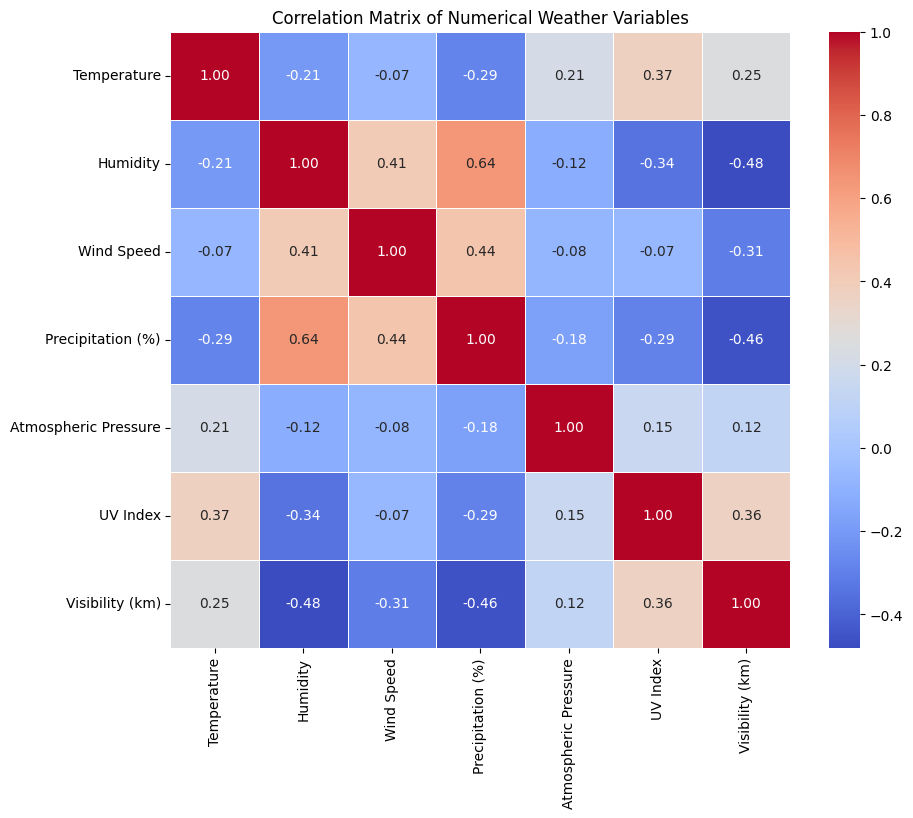

Correlation Matrix:
|                      | Temperature   | Humidity   | Wind Speed   | Precipitation (%)   | Atmospheric Pressure   | UV Index   | Visibility (km)   |
|:---------------------|:--------------|:-----------|:-------------|:--------------------|:-----------------------|:-----------|:------------------|
| Temperature          | 1             | -0.207969  | -0.0700219   | -0.287206           | 0.209188               | 0.374773   | 0.250751          |
| Humidity             | -0.207969     | 1          | 0.406079     | 0.638631            | -0.120653              | -0.342694  | -0.479969         |
| Wind Speed           | -0.0700219    | 0.406079   | 1            | 0.44377             | -0.077757              | -0.0681473 | -0.311828         |
| Precipitation (%)    | -0.287206     | 0.638631   | 0.44377      | 1                   | -0.177444              | -0.291601  | -0.457444         |
| Atmospheric Pressure | 0.209188      | -0.120653  | -0.077757    | -0.177444        

In [10]:
# Select numerical columns for correlation analysis
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
corr_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Weather Variables')
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix.to_markdown(numalign="left", stralign="left"))

In [11]:
# Separate the Temperature data for each Weather Type group
groups = df.groupby('Weather Type')['Temperature']
group_data = [group for name, group in groups]

# Perform the One-Way ANOVA test
f_statistic, p_value_anova = stats.f_oneway(*group_data)

print("One-Way ANOVA Results (Comparing Mean Temperature across Weather Types):")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value_anova:.4f}")

# Print means for reference
print("\nMean Temperature by Weather Type:")
print(groups.mean().to_markdown(numalign="left", stralign="left"))


# Interpret the results based on alpha = 0.05
alpha = 0.05
if p_value_anova < alpha:
    print(f"\nSince the p-value ({p_value_anova:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant difference in mean temperatures across the different Weather Types.")
else:
    print(f"\nSince the p-value ({p_value_anova:.4f}) is greater than alpha ({alpha}), we fail to reject the null hypothesis.")
    print("There is not enough statistically significant evidence to conclude that the mean temperatures differ across Weather Types.")

One-Way ANOVA Results (Comparing Mean Temperature across Weather Types):
F-statistic: 4797.6735
P-value: 0.0000

Mean Temperature by Weather Type:
| Weather Type   | Temperature   |
|:---------------|:--------------|
| Cloudy         | 22.8236       |
| Rainy          | 22.7882       |
| Snowy          | -1.53061      |
| Sunny          | 32.4291       |

Since the p-value (0.0000) is less than alpha (0.05), we reject the null hypothesis.
There is a statistically significant difference in mean temperatures across the different Weather Types.


# **UNIT-5**

--- 1. Matplotlib: Simple Line Plot (Temperature vs Index) ---


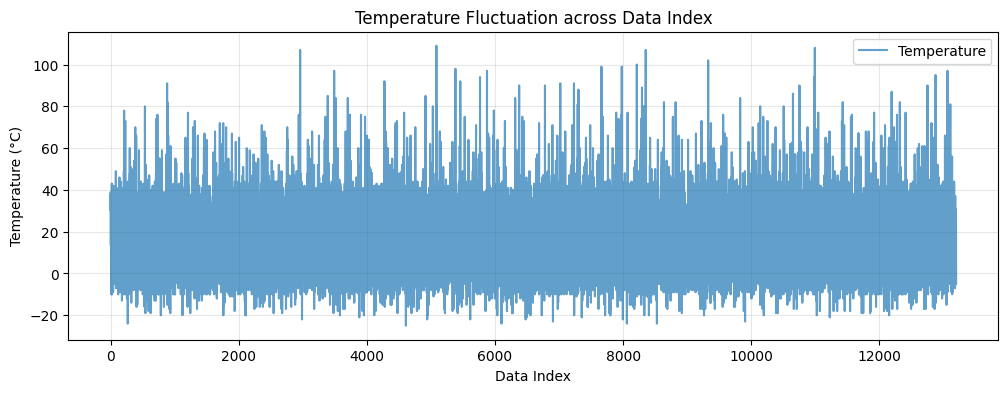

------------------------------


In [12]:
# Proceed only if df is loaded
if 'df' in globals() and df is not None and 'Temperature' in df.columns:
    print("--- 1. Matplotlib: Simple Line Plot (Temperature vs Index) ---")
    plt.figure(figsize=(12, 4)) # Wider figure for line plot
    # Plotting Temperature against the index
    plt.plot(df.index, df['Temperature'], label='Temperature', alpha=0.7)
    plt.title('Temperature Fluctuation across Data Index')
    plt.xlabel('Data Index')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    print("-" * 30)
else:
    print("DataFrame 'df' or column 'Temperature' not found.")

--- 2. Matplotlib: Scatter Plot (Temperature vs Humidity) ---


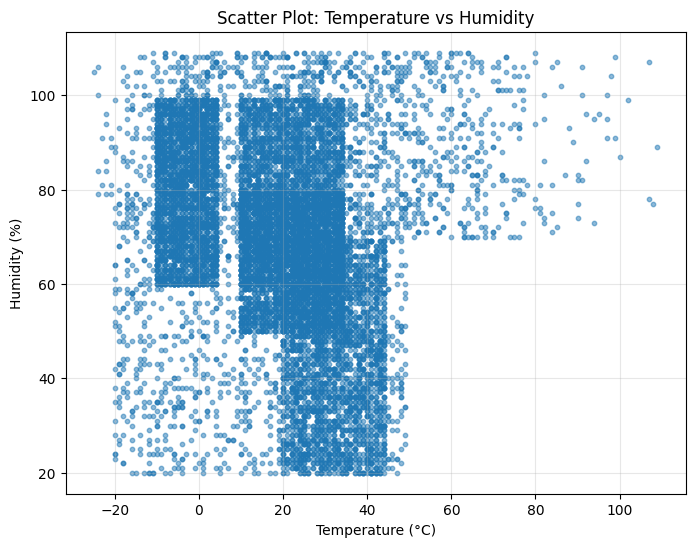

------------------------------


In [13]:
# Proceed only if df is loaded and required columns exist
if 'df' in globals() and df is not None and 'Temperature' in df.columns and 'Humidity' in df.columns:
    print("--- 2. Matplotlib: Scatter Plot (Temperature vs Humidity) ---")
    plt.figure(figsize=(8, 6))
    # Create scatter plot
    plt.scatter(df['Temperature'], df['Humidity'], alpha=0.5, s=10) # s adjusts marker size
    plt.title('Scatter Plot: Temperature vs Humidity')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Humidity (%)')
    plt.grid(True, alpha=0.3)
    plt.show()
    print("-" * 30)
else:
    print("DataFrame 'df' or columns 'Temperature'/'Humidity' not found.")

--- 3. Matplotlib: Visualizing Errors (Mean Temp per Season +/- Std Dev) ---


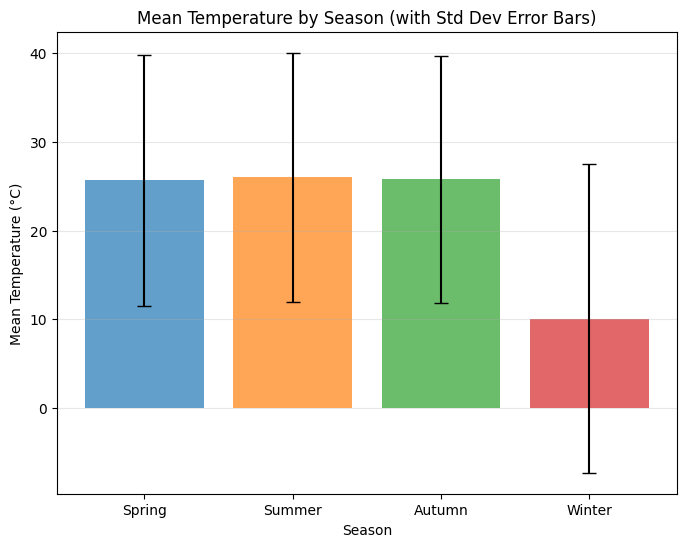


Seasonal Statistics:
| Season   |   mean |   std |
|:---------|-------:|------:|
| Spring   |  25.65 | 14.17 |
| Summer   |  26    | 14.05 |
| Autumn   |  25.8  | 13.92 |
| Winter   |  10.08 | 17.38 |
------------------------------


In [14]:
# Proceed only if df is loaded and required columns exist
if 'df' in globals() and df is not None and 'Temperature' in df.columns and 'Season' in df.columns:
    print("--- 3. Matplotlib: Visualizing Errors (Mean Temp per Season +/- Std Dev) ---")
    # Calculate mean and standard deviation of Temperature per Season
    seasonal_stats = df.groupby('Season')['Temperature'].agg(['mean', 'std']).reset_index()

    # Define the order of seasons if needed (optional, depends on desired plot order)
    season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
    seasonal_stats['Season'] = pd.Categorical(seasonal_stats['Season'], categories=season_order, ordered=True)
    seasonal_stats = seasonal_stats.sort_values('Season')


    # Create bar plot with error bars
    plt.figure(figsize=(8, 6))
    plt.bar(seasonal_stats['Season'], seasonal_stats['mean'],
            yerr=seasonal_stats['std'], # Use standard deviation for error bars
            capsize=5, # Adds caps to the error bars
            alpha=0.7, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']) # Example colors

    plt.title('Mean Temperature by Season (with Std Dev Error Bars)')
    plt.xlabel('Season')
    plt.ylabel('Mean Temperature (°C)')
    plt.grid(True, axis='y', alpha=0.3)
    plt.show()

    print("\nSeasonal Statistics:")
    print(seasonal_stats.round(2).to_markdown(index=False))
    print("-" * 30)
else:
    print("DataFrame 'df' or columns 'Temperature'/'Season' not found.")

--- 4. Matplotlib: Density Plot (Hexbin: Temp vs Humidity) ---


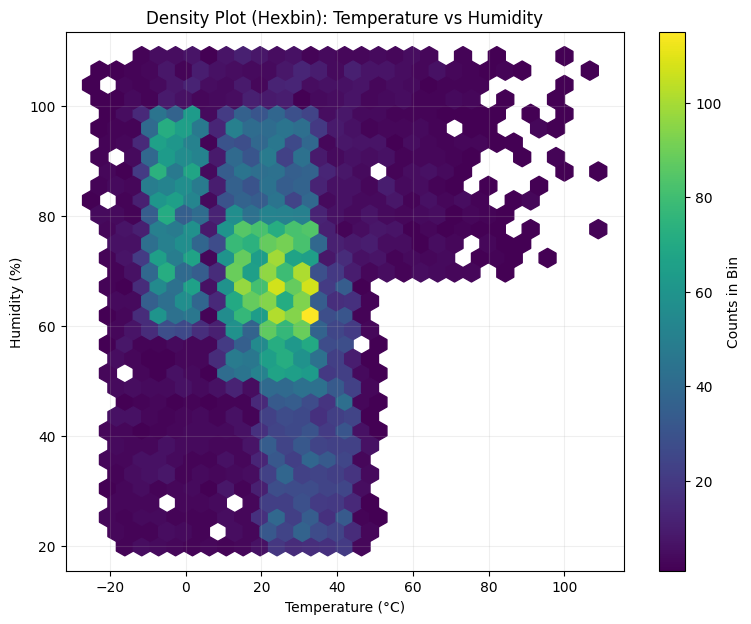

------------------------------


In [15]:
# Proceed only if df is loaded and required columns exist
if 'df' in globals() and df is not None and 'Temperature' in df.columns and 'Humidity' in df.columns:
    print("--- 4. Matplotlib: Density Plot (Hexbin: Temp vs Humidity) ---")

    # Create a hexbin plot
    plt.figure(figsize=(9, 7))
    # 'gridsize' controls the number of hexagons in the x-direction
    # 'cmap' sets the color map
    hb = plt.hexbin(df['Temperature'], df['Humidity'], gridsize=30, cmap='viridis', mincnt=1) # mincnt=1 includes bins with >=1 point

    # Add a color bar to show the counts
    cb = plt.colorbar(hb)
    cb.set_label('Counts in Bin')

    plt.title('Density Plot (Hexbin): Temperature vs Humidity')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Humidity (%)')
    plt.grid(True, alpha=0.2)
    plt.show()

    # Note: For contour plots, you might use plt.contourf after calculating 2D density,
    # e.g., using scipy.stats.gaussian_kde or seaborn.kdeplot(..., fill=True)
    print("-" * 30)
else:
    print("DataFrame 'df' or columns 'Temperature'/'Humidity' not found.")

--- 5. Matplotlib: Histograms and Binnings (Wind Speed) ---


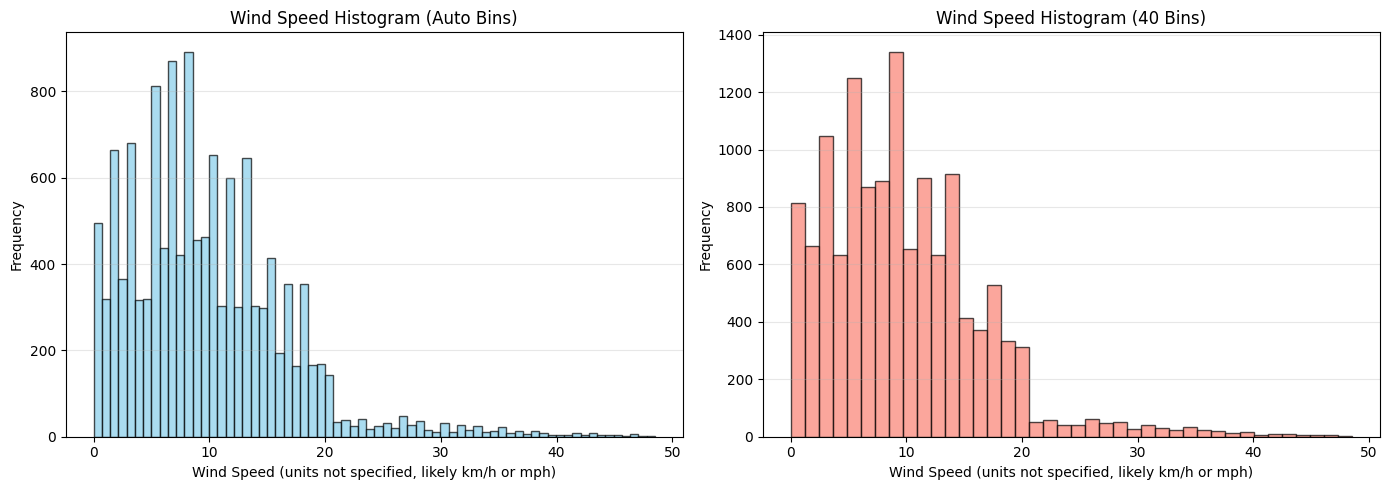

------------------------------


In [16]:
# Proceed only if df is loaded and 'Wind Speed' column exists
if 'df' in globals() and df is not None and 'Wind Speed' in df.columns:
    print("--- 5. Matplotlib: Histograms and Binnings (Wind Speed) ---")

    # Create a figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(14, 5)) # 1 row, 2 columns

    # Plot histogram with automatically determined bins (or a default number)
    axes[0].hist(df['Wind Speed'], bins='auto', alpha=0.7, color='skyblue', edgecolor='black')
    axes[0].set_title('Wind Speed Histogram (Auto Bins)')
    axes[0].set_xlabel('Wind Speed (units not specified, likely km/h or mph)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True, axis='y', alpha=0.3)

    # Plot histogram with a specific number of bins (e.g., 40)
    axes[1].hist(df['Wind Speed'], bins=40, alpha=0.7, color='salmon', edgecolor='black')
    axes[1].set_title('Wind Speed Histogram (40 Bins)')
    axes[1].set_xlabel('Wind Speed (units not specified, likely km/h or mph)')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True, axis='y', alpha=0.3)

    # Adjust layout and show plot
    plt.tight_layout() # Prevents labels from overlapping
    plt.show()
    print("-" * 30)
else:
    print("DataFrame 'df' or column 'Wind Speed' not found.")

--- 6. Matplotlib: Multiple Subplots (Histograms) ---


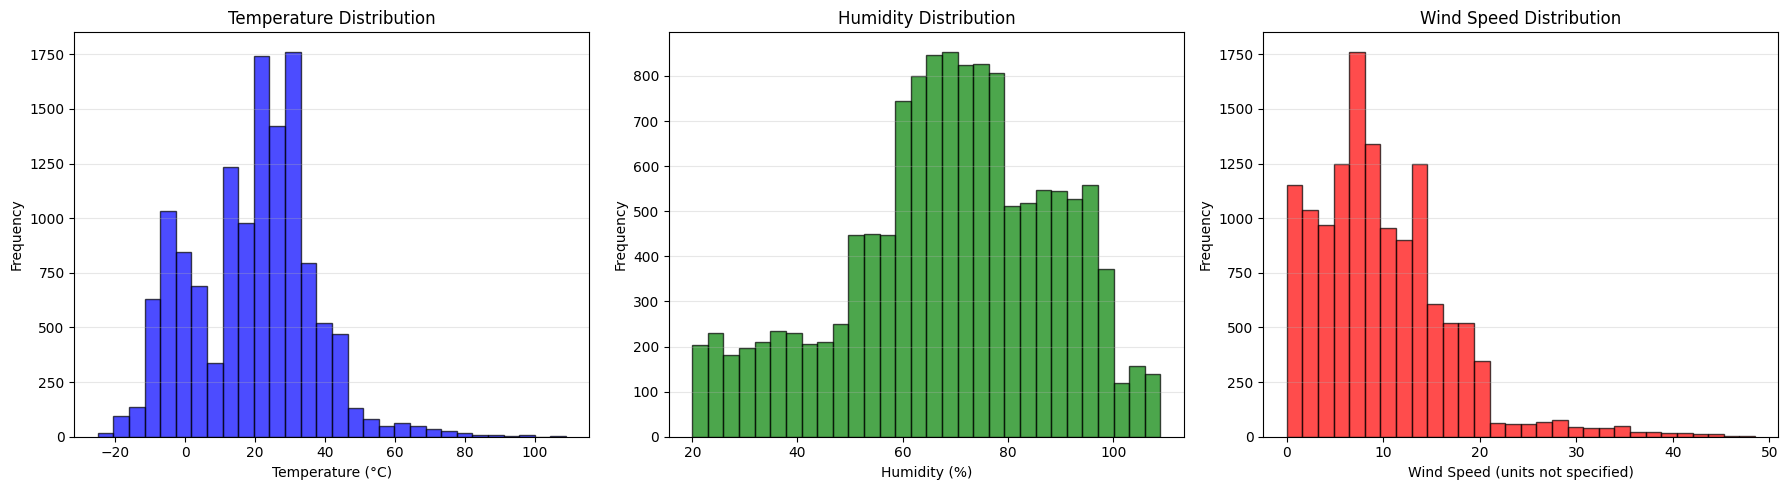

------------------------------


In [17]:
# Proceed only if df is loaded and required columns exist
if 'df' in globals() and df is not None and all(col in df.columns for col in ['Temperature', 'Humidity', 'Wind Speed']):
    print("--- 6. Matplotlib: Multiple Subplots (Histograms) ---")

    # Create a figure with 1 row and 3 columns of subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Adjust figsize as needed

    # Plot histogram for Temperature
    axes[0].hist(df['Temperature'], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[0].set_title('Temperature Distribution')
    axes[0].set_xlabel('Temperature (°C)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True, axis='y', alpha=0.3)

    # Plot histogram for Humidity
    axes[1].hist(df['Humidity'], bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[1].set_title('Humidity Distribution')
    axes[1].set_xlabel('Humidity (%)')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True, axis='y', alpha=0.3)

    # Plot histogram for Wind Speed
    axes[2].hist(df['Wind Speed'], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[2].set_title('Wind Speed Distribution')
    axes[2].set_xlabel('Wind Speed (units not specified)')
    axes[2].set_ylabel('Frequency')
    axes[2].grid(True, axis='y', alpha=0.3)

    # Adjust layout to prevent overlapping titles/labels
    plt.tight_layout()
    plt.show()
    print("-" * 30)
else:
    print("DataFrame 'df' or required columns ('Temperature', 'Humidity', 'Wind Speed') not found.")

--- 7. Matplotlib: 3D Scatter Plot (Temp, Humidity, Wind Speed) ---


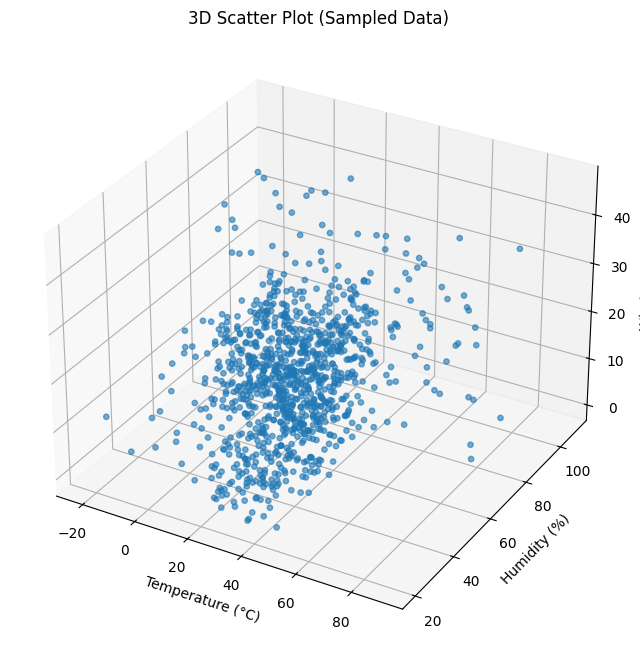

(Plot generated using a sample of 1000 data points)
------------------------------


In [18]:
# Proceed only if df is loaded and required columns exist
if 'df' in globals() and df is not None and all(col in df.columns for col in ['Temperature', 'Humidity', 'Wind Speed']):
    print("--- 7. Matplotlib: 3D Scatter Plot (Temp, Humidity, Wind Speed) ---")

    # Take a random sample for better performance/visualization
    sample_size = 1000
    if len(df) > sample_size:
        df_sample = df.sample(n=sample_size, random_state=42) # random_state for reproducibility
    else:
        df_sample = df

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    ax.scatter(df_sample['Temperature'], df_sample['Humidity'], df_sample['Wind Speed'],
               alpha=0.6, s=15) # s is marker size

    # Set labels and title
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Humidity (%)')
    ax.set_zlabel('Wind Speed')
    ax.set_title('3D Scatter Plot (Sampled Data)')

    plt.show()
    print(f"(Plot generated using a sample of {len(df_sample)} data points)")
    print("-" * 30)
else:
    print("DataFrame 'df' or required columns ('Temperature', 'Humidity', 'Wind Speed') not found.")

--- 9a. Seaborn: Box Plot (Temperature by Season) ---


<ipython-input-19-448ae335399b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Season', y='Temperature', order=season_order, palette='viridis') # Using a seaborn palette


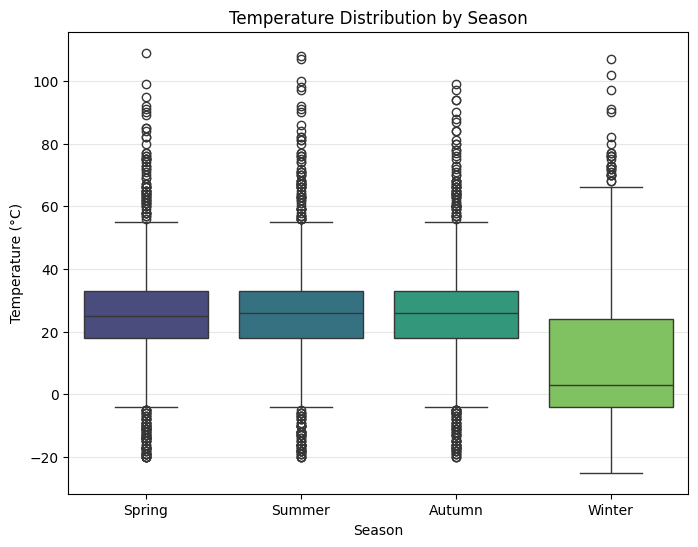

------------------------------


In [19]:
# Proceed only if df is loaded and required columns exist
if 'df' in globals() and df is not None and 'Temperature' in df.columns and 'Season' in df.columns:
    print("--- 9a. Seaborn: Box Plot (Temperature by Season) ---")

    # Define the order of seasons for the plot
    season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Season', y='Temperature', order=season_order, palette='viridis') # Using a seaborn palette
    plt.title('Temperature Distribution by Season')
    plt.xlabel('Season')
    plt.ylabel('Temperature (°C)')
    plt.grid(True, axis='y', alpha=0.3)
    plt.show()
    print("-" * 30)
else:
    print("DataFrame 'df' or columns 'Temperature'/'Season' not found.")

--- 9b. Seaborn: Pair Plot (Sampled Data, Selected Columns) ---


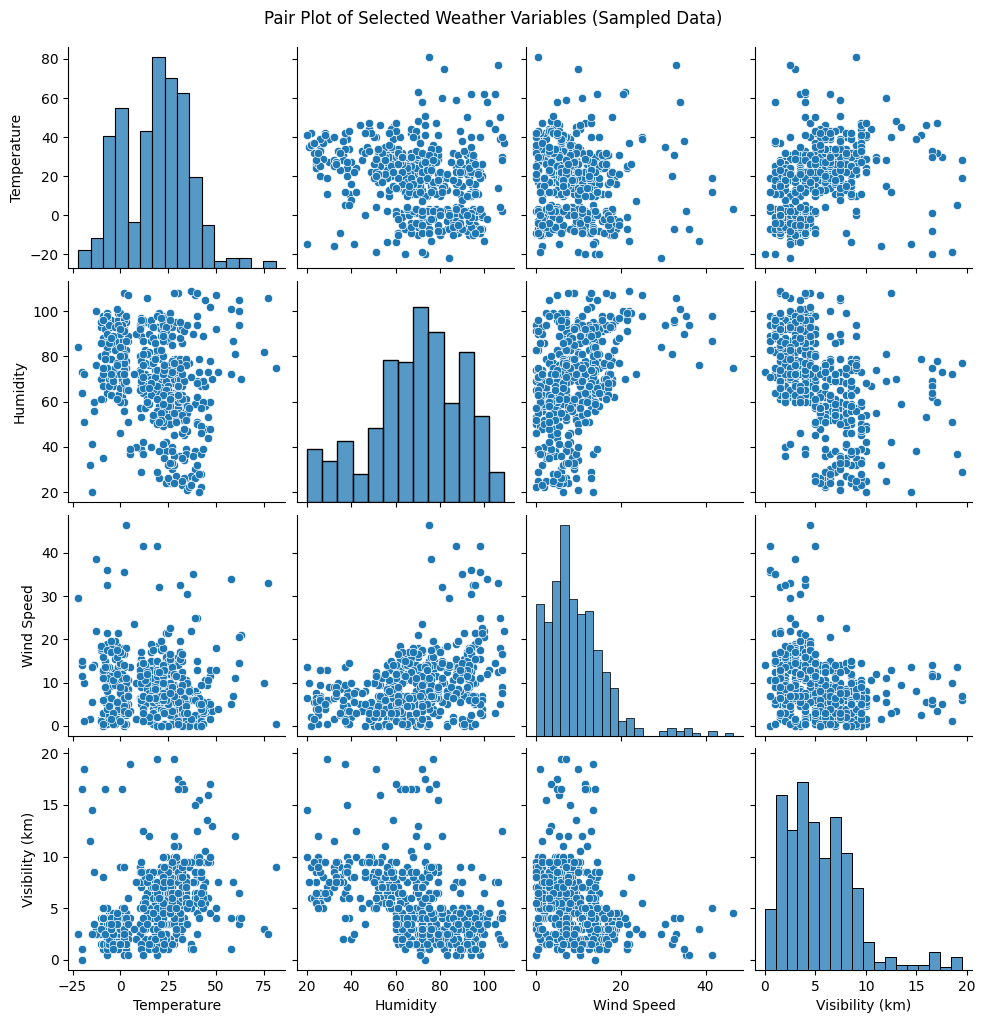

(Plot generated using a sample of 500 data points)
------------------------------


In [20]:
# Proceed only if df is loaded
if 'df' in globals() and df is not None:
    print("--- 9b. Seaborn: Pair Plot (Sampled Data, Selected Columns) ---")

    # Select a few key numerical columns for the pair plot
    pairplot_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Visibility (km)']
    # Ensure selected columns exist
    existing_pairplot_cols = [col for col in pairplot_cols if col in df.columns]

    if len(existing_pairplot_cols) > 1:
        # Take a smaller sample for pairplot performance
        sample_size_pairplot = 500 # Reduced sample size for pairplot
        if len(df) > sample_size_pairplot:
             # Use .copy() to avoid potential SettingWithCopyWarning on the original df
             df_sample_pairplot = df[existing_pairplot_cols].sample(n=sample_size_pairplot, random_state=42).copy()
        else:
             df_sample_pairplot = df[existing_pairplot_cols].copy()


        # Create the pair plot using seaborn.pairplot
        # 'hue' can be added to color points by a categorical variable, e.g., hue='Season' (optional, might make it busy)
        # sns.pairplot(df_sample_pairplot, vars=existing_pairplot_cols) # Plotting only selected columns
        sns.pairplot(df_sample_pairplot) # Plots all columns in the sample dataframe

        plt.suptitle('Pair Plot of Selected Weather Variables (Sampled Data)', y=1.02) # Add title above plots
        plt.show()
        print(f"(Plot generated using a sample of {len(df_sample_pairplot)} data points)")
    else:
        print(f"Found only {len(existing_pairplot_cols)} numerical column(s) from the list. Need at least 2 for a pair plot.")


    print("-" * 30)
else:
    print("DataFrame 'df' not found. Please run the loading block first.")